<a href="https://colab.research.google.com/github/pasancardiffmet/CIS7034-PRAC1-Nao-CNN-Image-Classification/blob/main/ST20319008_CIS7034_PRAC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preparation

This section loads the CIFAR-10 dataset, preprocesses the images by normalizing
pixel values, and prepares the labels for categorical classification.


In [1]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import os

In [2]:
# Define the 10 class names for CIFAR-10
cifar10_class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


##Data Cleaning (Minimal for CIFAR-10):
In this case, data cleaning primarily involves checking for missing values
(which are not present in CIFAR-10) and ensuring data types are suitable.
The main preprocessing step is normalization.

In [3]:
# Normalize pixel values to be between 0 and 1
# Images are originally in uint8 format with values from 0 to 255.
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
# Convert labels to one-hot encoding
# This is required for categorical crossentropy loss in the model.
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

#Reshaping the dataset
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train_categorical: (50000, 10)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test_categorical: (10000, 10)


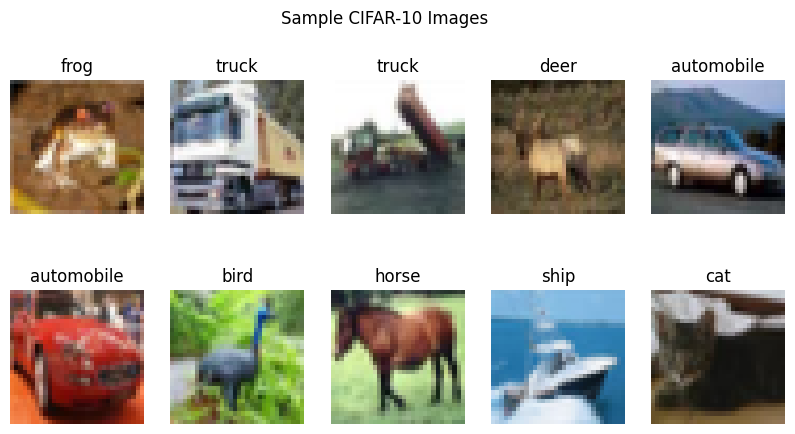

In [5]:
# Main Data Statistics:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train_categorical:", y_train_categorical.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test_categorical:", y_test_categorical.shape)

# Display sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(cifar10_class_names[np.argmax(y_train_categorical[i])])
    plt.axis('off')
plt.suptitle("Sample CIFAR-10 Images")
plt.show()


## 2. Convolutional Neural Network (CNN) Model Construction

This section defines the architecture of the CNN model using Keras.
The model consists of convolutional layers, max-pooling layers, dropout layers, Batch normalization,
a flattening layer, and dense layers for classification.  

The designed CNN structure uses following elements:


*   Convolutional Layers - These are used to learn complex image features at each step.
*   Batch Normalization - Batchnormalization is used to stabalise the training process by normalising the output of the previous layer. This can increase robustness of the model.
*   Max Pooling - Max pooling was used to reduce the size of the feature maps generated by convolutional layers to decrease computational cost.
*   Dropout layers - Dropout layers were used to randomly ignore a part of learned features at each block. This can help reduce overfitting.



In [6]:
# Define the CNN model
model = Sequential()

# Convolutional Block 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# Flattening and Dense Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Print the model summary to see the architecture and number of parameters
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 558,634 (2.13 MB)

 Trainable params: 556,714 (2.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

## 3. Model Training, Testing, and Validation

This section covers compiling the model, training it on the prepared data,
and evaluating its performance on the test set.


In [7]:
# Compile the model
# Using Adam optimizer, categorical crossentropy loss  for multi-class classification
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Define the number of epochs and batch size for training
epochs = 50 # Number of training iterations
batch_size = 64

# Train the model
# validation split was used to monitor performance on unseen data during training.
# This helps detect overfitting.
print("Starting model training...")
history = model.fit(X_train, y_train_categorical,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1, # Use 10% of training data for validation
                    verbose=1) # Display progress during training
print("Model training finished.")

Starting model training...
Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.3288 - loss: 2.1645 - val_accuracy: 0.4584 - val_loss: 1.5627
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5609 - loss: 1.2453 - val_accuracy: 0.6524 - val_loss: 0.9656
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6536 - loss: 0.9811 - val_accuracy: 0.7176 - val_loss: 0.8250
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7024 - loss: 0.8502 - val_accuracy: 0.7468 - val_loss: 0.7135
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7335 - loss: 0.7601 - val_accuracy: 0.7314 - val_loss: 0.8093
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7597 - loss: 0.6910 - val_accuracy: 0.7526 - val_loss: 0.7138
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7819 - loss: 0.6324 - val_accuracy: 0.7818 - val_loss: 0.6221
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.79

In [8]:
# Evaluate the model on the test set
print("Evaluating model on the test set...")
score = model.evaluate(X_test, y_test_categorical, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Model evaluation finished.")

Evaluating model on the test set...
Test loss: 0.5723384022712708
Test accuracy: 0.8446999788284302
Model evaluation finished.


In [9]:
# Save the trained model weights for using with the Nao Robot
model_weights_path = 'my_model_.weights.h5'
model.save_weights('my_model_.weights.h5')

## 4. Model Performance Discussion and Analysis

The model demonstrates strong learning capabilities, achieving a  test accuracy of approximately 84.5%. The training process shows a consistent improvement in accuracy and reduction in loss over the 50 epochs, as visualized in the provided plots. validation accuracy also trends upwards, indicating good generalization to unseen data,. While there's a gap between training and validation loss, suggesting some overfitting, the model still maintains a high level of performance on the validation set.









<ipython-input-10-528e38b3a7f5>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


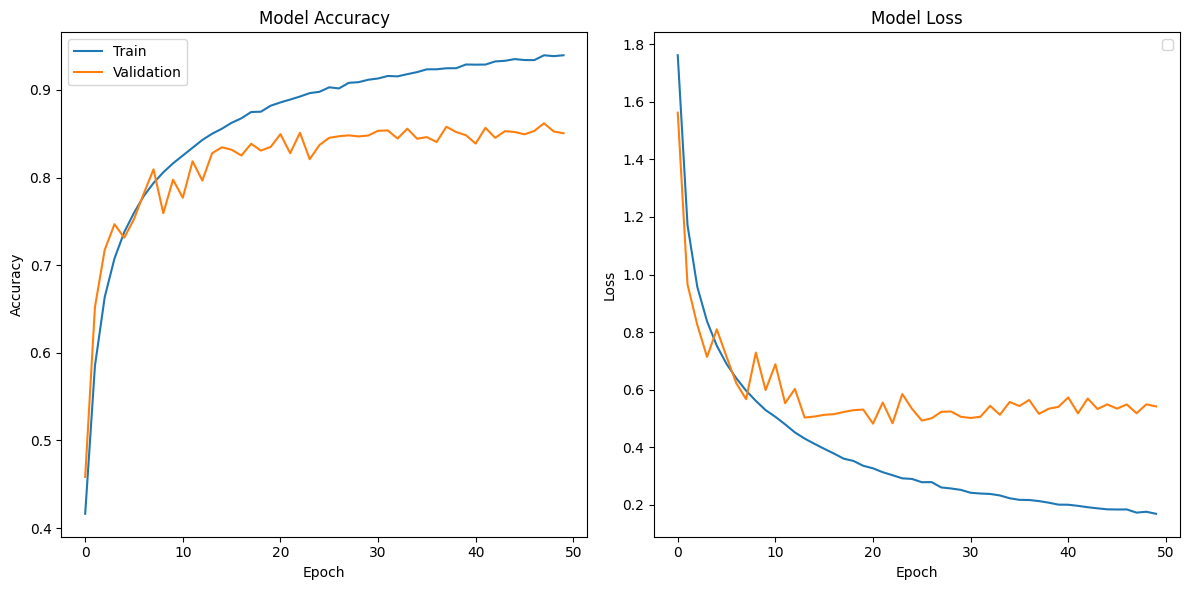

In [10]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

#Streamlit Code for the implementation of the Model in NaoRobot

In [ ]:

import time
from PIL import Image
from naoqi import ALProxy
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
import os
import cv2
# Loading the model weights saved from the training step
model_weights_path = 'my_model_.weights.h5'
cifar10_class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Re-define the model architecture (same as in the trained model)
# Define the CNN model
model = Sequential()

# Convolutional Block 1q
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


# Flattening and Dense Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


# Load the trained weights into the model
model.load_weights(model_weights_path)
print "Successfully loaded model weights for Nao integration."



# Nao Robot Connection
nao_ip = "172.18.16.45"
nao_port = 9559

# Naoqi Service Proxies
video_service = None
tts_service = None
try:
    # Connect to Naoqi services
    video_service = ALProxy("ALVideoDevice", nao_ip, nao_port)
    tts_service = ALProxy("ALTextToSpeech", nao_ip, nao_port)
    print "Connected to Naoqi services."
    # --- Nao Introduction ---
    # Set volume to be loud (value between 0.0 and 1.0)
    initial_volume = tts_service.getVolume() # Save current volume
    tts_service.setVolume(2) # Set a high volume
    # Nao introduces itself and the demonstration
    intro_text = "Hello, I'm Nao. This is an image classification demonstration from the CIFAR 10 dataset. This uses a custom CNN Model"
    print "Nao is about to say: {}".format(intro_text)
    tts_service.say(intro_text)
    tts_service.say("Presented by Pasan Jayaweera Student ID-st20319008")
    tts_service.say("The image classes I can recognise are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck ")
    print "Nao finished introduction."

    # --- Step 1 & 2: Nao Captures and Transfers Image ---

    # Subscribe to the Nao's camera (Top camera, VGA resolution, RGB color space, 5 fps)
    camera_client_name = "cifar10_classifier_client"
    resolution = 2 # VGA (640x480)
    colorSpace = 11 # RGB
    fps = 5
    camera_index = 0 # Top camera

    print "Subscribing to Nao camera..."
    video_client = video_service.subscribeCamera(
        camera_client_name, camera_index, resolution, colorSpace, fps
    )
    print "Camera subscribed."

    # Get a single image frame
    print "Getting image from Nao camera..."
    nao_image = video_service.getImageRemote(video_client)
    print "Image captured."

    # # Unsubscribe from the camera
    # video_service.unsubscribe(video_client)
    # print "Camera unsubscribed."

    # --- Continuous Classification Loop ---
    print "\nStarting continuous image capture and classification. Press 'q' on the image window to exit."
    while True:
        # Get a single image frame
        nao_image = video_service.getImageRemote(video_client)
        #Check if image capture was successful
        if nao_image is None:
            print "Warning: Failed to capture image from Nao. Skipping this frame."
            time.sleep(0.1) # Add a small delay before trying again
            continue # Skip the rest of the loop and try to get the next frame
        image_width = nao_image[0]
        image_height = nao_image[1]
        image_array = nao_image[6] # Raw image data
        image_string = str(bytearray(image_array)) # Convert byte array to string for PIL

        # Create a PIL Image from the raw data

        pil_image = Image.frombytes("RGB", (image_width, image_height), image_string)

        #Display Captured Image using OpenCV
        if pil_image:
            # Convert PIL image to OpenCV format (BGR) for display
            # Naoqi colorSpace 11 is RGB, OpenCV expects BGR for imshow
            cv_image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

            # Display the image
            cv2.imshow("Nao Camera Feed", cv_image)

            # Preprocess Image for CNN
            # Resize the image to 32x32 pixels
            # Use LANCZOS resampling for high-quality downsampling
            try:
                resized_image = pil_image.resize((32, 32), Image.LANCZOS)
            except AttributeError:
                try:
                     resized_image = pil_image.resize((32, 32), Image.ANTIALIAS)
                except AttributeError:
                     resized_image = pil_image.resize((32, 32))


            # Convert PIL image to a NumPy array
            img_array = np.array(resized_image)

            # Normalize the pixel values
            img_array = img_array.astype('float32') / 255.0

            img_array = np.expand_dims(img_array, axis=0) # Shape becomes (1, 32, 32, 3)


            #Step 4: CNN Prediction
            # Make a prediction using the loaded model
            predictions = model.predict(img_array)
            predicted_class_index = np.argmax(predictions[0])
            predicted_class_name = cifar10_class_names[predicted_class_index]
            print "Predicted class name: {}".format(predicted_class_name)

            # Nao speaks the predicted class name
            nao_response = "I see a {}.".format(predicted_class_name)
            tts_service.say(nao_response)

        # Check for key press to exit the loop
        # cv2.waitKey(1) waits for a key event for 1ms
        key = cv2.waitKey(1) & 0xFF
        if key == ord("q"): # Exit if 'q' is pressed
            print "Exiting continuous capture loop."
            break

        # Add a small delay to control the loop speed
        time.sleep(1.5)  # Adjust as needed


except RuntimeError as e:
    print "Could not connect to Naoqi. Please check the IP, port, and ensure Naoqi is running. Error: {}".format(e)
except Exception as e:
    print "An error occurred during Nao integration: {}".format(e)


##Youtube Link - [https://www.youtube.com/watch?v=iksTxRwbaCA](https://www.youtube.com/watch?v=iksTxRwbaCA)
##Github Link - [https://github.com/pasancardiffmet/CIS7034-PRAC1-Nao-CNN-Image-Classification/tree/main](https://github.com/pasancardiffmet/CIS7034-PRAC1-Nao-CNN-Image-Classification/tree/main)